<a href="https://colab.research.google.com/github/sebaszx/Tarea3Modulo3CienciasDelosDatos/blob/main/Tarea3_EstadisticaParaCienciaDeLosDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística para Ciencia de los Datos

---



# Tarea #3
Esta tarea se puede realizar en parejas si así lo desean. La presente asignación busca que los estudiantes apliquen intervalos de confianza como un medio para explorar los conjuntos de datos de la Tarea \#2.  En esa tarea se pidió analizar un grupo de columnas en busca de las distribuciones que modelaban más adecuadamente cada una.

Se pide a los estudiantes que seleccionen 2 columnas de variables cuantitativas del conjunto de datos y exploren intervalos de confianza y el contexto alrededor de ellos. 






Nótese que los apartados anteriores deben desarrollarse 2 veces. Una vez por cada columna.

Como ha sido costumbre, se espera que los estudiantes entreguen un notebook de colab con tanto nivel de detalle como sea posible. La calificación de cada apartado depende que los estudiantes hayan logrado demostrar con claridad y detalle lo planteado en cada punto.

Los estudiantes deberán realizar la entrega a través de TEC Digital a más tardar el día 24 de julio a las 10:00 PM.

**Estudiantes:**


1.   Sebastián Porras
2.   Luis Vargas



In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.stats import norm
import numpy as np
#import torch
from statistics import stdev, pstdev,mean

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/sebaszx/Tarea2CienciasDeLosDatosModulo3/main/datasetTarea2.csv")

In [ ]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,unknownCol
0,0.32,Premium,J,VS2,61.9,58.0,504,4.38,4.35,2.70,5.1
1,1.50,Good,F,SI2,62.9,59.0,7727,7.19,7.32,4.56,4.9
2,0.38,Ideal,H,VS1,61.7,55.0,955,4.65,4.70,2.89,4.7
3,0.53,Ideal,F,VVS1,62.1,53.2,2273,5.17,5.21,3.22,4.6
4,0.55,Ideal,D,VS2,60.6,56.0,2224,5.30,5.36,3.23,5.0
5,0.52,Premium,I,SI1,62.5,59.0,1073,5.12,5.06,3.18,5.4
6,0.51,Very Good,E,VS2,62.8,56.0,1612,5.11,5.14,3.22,4.6
7,0.37,Very Good,D,VS2,60.0,57.0,760,4.70,4.76,2.84,5.0
8,1.06,Premium,E,SI1,63.0,56.0,4689,6.54,6.45,4.09,4.4
9,0.41,Ideal,G,IF,62.4,54.0,1259,4.76,4.79,2.98,4.9


#Parte 1

Para toda esta tarea vamos a suponer que el set de datos de diamantes es nuestra población de interés. Partiendo de este supuesto, para ambas columnas obtenga el promedio poblacional y la desviación estándar poblacional.

Con estas medias poblacionales los estudiantes deberán, para ambas columnas:
- Seleccionar una muestra aleatoria con un $n$ = 25.
- Crear 1 intervalo de confianza para la media con un nivel de confianza de 90\% e indique si incluye el promedio poblacional.(**10 puntos**)
- Igual que el anterior, con un nivel de confianza de 95% e indique si incluye el promedio poblacional. (**5 puntos**)
- Igual que el anterior, con una confianza de 99% e indique si incluye el promedio poblacional. (**5 puntos**)

##Muestras aleatorias de variables selecionadas

Las columnas cuantitativas seleccionadas son:


1.   depth
2.   price



In [ ]:
price=df['price']
depth=df['depth'] # con table cambia un poco

In [ ]:
# Utilizando el paquete statistics de python calculamos stdev, pstdev.
# Este último se utiliza para la desviación estándar poblacional
depth_mean=mean(depth)
price_mean=mean(price)
depth_pstdev=pstdev(depth)
price_pstdev=pstdev(price)

print(f'Media depth {depth_mean}')
print(f'Desviación estándar depth {depth_pstdev}')
print(f'Media price {price_mean}')
print(f'Desviación estándar price {price_pstdev}')

Media depth 61.788
Desviación estándar depth 1.4213922752006214
Media price 3751.065
Desviación estándar price 3875.0370528260755


In [ ]:
#Se escoge un muestra aleatoria de n = 25
def RandomChoice(datos,n):
  return np.random.choice(datos,size=n)
np.random.seed(30)
#np.random.seed(125)
randomChoiceDepth=RandomChoice(depth,n=25)
randomChoicePrice=RandomChoice(price,n=25)

print(f'muestra aleatoria depth {randomChoiceDepth}')
print('\n')
print(f'muestra aleatoria price {randomChoicePrice}')

muestra aleatoria depth [62.8 61.4 61.6 61.8 63.2 62.2 62.9 59.3 62.  61.5 61.4 62.4 60.  62.6
 61.9 60.3 61.6 60.  62.9 61.9 61.9 61.1 63.  59.6 59.2]


muestra aleatoria price [ 3653  8207  4394  2113  6617  3653  4356   429  6532  1668  4935   521
  4341  1760   968   878  2367  3249 13324  7550   927 10106   943 14735
 13324]


Dado que conocemos la desviación estándar de la población $\sigma$, podemos sustituir $\sigma_{\overline{x}}=\sigma/\sqrt n$, y obtener:

\begin{equation}
\overline{x}\pm\frac{\sigma\, z_{\alpha/2}}{\sqrt{n}}
\end{equation}

A continuación, se implementa una función para calcular inetrvalos de confianza, con base en el valor crítico de $Z$, la desviación estándar poblacional y el valor de $\alpha$, para niveles de confianza determinados.

In [ ]:
#Función para calcular intervalos de confianza (desviación estándar conocida)
def IntervaloConfianza(media_sample,media_poblacional,pstdev,n,alpha,col):
  intervaloInferior=media_sample-((norm.ppf(1-alpha/2)*pstdev)/np.sqrt(n))
  intervaloSuperior=media_sample+((norm.ppf(1-alpha/2)*pstdev)/np.sqrt(n))
  print('Tamaño del intervalo =', abs(intervaloInferior-intervaloSuperior))# Esto es para ver si el intervalo crece o se hace más pequeño
  print('Media de la muestra =', media_sample)
  if intervaloInferior <= media_poblacional and media_poblacional <= intervaloSuperior:
    return f'La media poblacional {media_poblacional} se encuentra entre los valores de {intervaloInferior} y {intervaloSuperior} con un alpha de {alpha} y un N de {n} para la columna {col}'
  else:
    return f'La media poblacional {media_poblacional} NO se encuentra entre los valores de {intervaloInferior} y {intervaloSuperior} con un alpha de {alpha} y un N de {n} para la columna {col}'
  

##Intervalos de confianza - Variable 'depth'

In [ ]:
#Depth
#Se calculan los intervalos de confianza con niveles de confianza de 90%, 95% y 99%, respectivamente
DepthConfianza=IntervaloConfianza(mean(randomChoiceDepth),depth_mean,depth_pstdev,len(randomChoiceDepth),.10,'Depth')
print(DepthConfianza)
print('\n')
DepthConfianza=IntervaloConfianza(mean(randomChoiceDepth),depth_mean,depth_pstdev,len(randomChoiceDepth),.05,'Depth')
print(DepthConfianza)
print('\n')
DepthConfianza=IntervaloConfianza(mean(randomChoiceDepth),depth_mean,depth_pstdev,len(randomChoiceDepth),.01,'Depth')
print(DepthConfianza)
print('\n')

Tamaño del intervalo = 0.935192895673822
Media de la muestra = 61.54
La media poblacional 61.788 se encuentra entre los valores de 61.07240355216309 y 62.00759644783691 con un alpha de 0.1 y un N de 25 para la columna Depth


Tamaño del intervalo = 1.1143510669186583
Media de la muestra = 61.54
La media poblacional 61.788 se encuentra entre los valores de 60.98282446654067 y 62.09717553345933 con un alpha de 0.05 y un N de 25 para la columna Depth


Tamaño del intervalo = 1.4645055497199166
Media de la muestra = 61.54
La media poblacional 61.788 se encuentra entre los valores de 60.80774722514004 y 62.27225277485996 con un alpha de 0.01 y un N de 25 para la columna Depth




##Intervalos de confianza - Variable 'price'

In [ ]:
#Price
#Se calculan los intervalos de confianza con niveles de confianza de 90%, 95% y 99%, respectivamente
PriceConfianza=IntervaloConfianza(mean(randomChoicePrice),price_mean,price_pstdev,len(randomChoicePrice),.10,'Price')
print(PriceConfianza)
print('\n')
PriceConfianza=IntervaloConfianza(mean(randomChoicePrice),price_mean,price_pstdev,len(randomChoicePrice),.05,'Price')
print(PriceConfianza)
print('\n')
PriceConfianza=IntervaloConfianza(mean(randomChoicePrice),price_mean,price_pstdev,len(randomChoicePrice),.01,'Price')
print(PriceConfianza)
print('\n')

Tamaño del intervalo = 2549.547500364926
Media de la muestra = 4862
La media poblacional 3751.065 se encuentra entre los valores de 3587.2262498175373 y 6136.773750182463 con un alpha de 0.1 y un N de 25 para la columna Price


Tamaño del intervalo = 3037.973224918937
Media de la muestra = 4862
La media poblacional 3751.065 se encuentra entre los valores de 3343.0133875405313 y 6380.986612459468 con un alpha de 0.05 y un N de 25 para la columna Price


Tamaño del intervalo = 3992.5735972028688
Media de la muestra = 4862
La media poblacional 3751.065 se encuentra entre los valores de 2865.7132013985656 y 6858.286798601434 con un alpha de 0.01 y un N de 25 para la columna Price




¿Qué concluye de los intervalos de confianza anteriores? ¿Aumentan, disminuyen, se mantienen igual?
Si hay cambios, ¿por qué ocurre esto? (**10 puntos**)


Como nuestra única variable que cambia es el $α$ podemos decir con seguridad que conforme $α$ disminuye, el intervalo de confianza crece. Por definición, el intervalo de confianza se expresa como $1 - \alpha$, por lo que son valores complementarios.

En el caso particular de las variables seleccionadas, se observa también que la media poblacional usualmente sí se encuentra dentro de los diferentes intervalos de confianza estimados para ambas variables. No obstante, en algunos casos, dependiendo de la muestra aleatoria, puede que el intervalo de confianza de la variable 'price' no incluya la media poblacional para valores de $\alpha$ de $0.10$, o incluso $0.05$. Por ejemplo, ver $np.random.seed(125)$ al seleccionar la muestra aleatoria. Esto puede deberse en parte a que la varianza de 'price' es relativamente alta; de hecho, la desviación estándar poblacional es mayor que la media poblacional.

#Parte 2

- Analizar al menos 3 valores de $n$, es decir use al menos 3 muestras aleatorias de diferentes tamaños (por ejemplo 5, 20, 50). Explique que impacto tiene $n$ en el intervalo de confianza, además indique si se incluye o no el promedio poblacional en cada caso. En este caso use un nivel de confianza de 95\% (**20 puntos**)

##Variable 'depth'

In [ ]:
#Depth 
print('Con n = 5:')
randomChoiceDepth_5=RandomChoice(depth,n=5)
DepthConfianza=IntervaloConfianza(mean(randomChoiceDepth_5),depth_mean,depth_pstdev,len(randomChoiceDepth_5),.05,'Depth')
print(DepthConfianza)
print('\n')

print('Con n = 20:')
randomChoiceDepth_20=RandomChoice(depth,n=20)
DepthConfianza=IntervaloConfianza(mean(randomChoiceDepth_20),depth_mean,depth_pstdev,len(randomChoiceDepth_20),.05,'Depth')
print(DepthConfianza)
print('\n')

print('Con n = 50:')
randomChoiceDepth_50=RandomChoice(depth,n=50)
DepthConfianza=IntervaloConfianza(mean(randomChoiceDepth_50),depth_mean,depth_pstdev,len(randomChoiceDepth_50),.05,'Depth')
print(DepthConfianza)

Con n = 5:
Tamaño del intervalo = 2.491764736429559
Media de la muestra = 60.86
La media poblacional 61.788 se encuentra entre los valores de 59.61411763178522 y 62.10588236821478 con un alpha de 0.05 y un N de 5 para la columna Depth


Con n = 20:
Tamaño del intervalo = 1.2458823682147795
Media de la muestra = 61.75
La media poblacional 61.788 se encuentra entre los valores de 61.12705881589261 y 62.37294118410739 con un alpha de 0.05 y un N de 20 para la columna Depth


Con n = 50:
Tamaño del intervalo = 0.7879651960406591
Media de la muestra = 61.49
La media poblacional 61.788 se encuentra entre los valores de 61.09601740197967 y 61.88398259802033 con un alpha de 0.05 y un N de 50 para la columna Depth


##Variable 'price'

In [ ]:
#price
print('Con n = 5:')
randomChoicePrice_5=RandomChoice(price,n=5)
PriceConfianza=IntervaloConfianza(mean(randomChoicePrice_5),price_mean,price_pstdev,len(randomChoicePrice_5),.05,'Price')
print(PriceConfianza)
print('\n')

print('Con n = 20:')
randomChoicePrice_20=RandomChoice(price,n=20)
PriceConfianza=IntervaloConfianza(mean(randomChoicePrice_20),price_mean,price_pstdev,len(randomChoicePrice_20),.05,'Price')
print(PriceConfianza)
print('\n')

print('Con n = 50:')
randomChoicePrice_50=RandomChoice(price,n=50)
PriceConfianza=IntervaloConfianza(mean(randomChoicePrice_50),price_mean,price_pstdev,len(randomChoicePrice_50),.05,'Price')
print(PriceConfianza)

Con n = 5:
Tamaño del intervalo = 6793.114644743
Media de la muestra = 1502
La media poblacional 3751.065 se encuentra entre los valores de -1894.5573223715005 y 4898.5573223715 con un alpha de 0.05 y un N de 5 para la columna Price


Con n = 20:
Tamaño del intervalo = 3396.5573223715
Media de la muestra = 4408
La media poblacional 3751.065 se encuentra entre los valores de 2709.72133881425 y 6106.27866118575 con un alpha de 0.05 y un N de 20 para la columna Price


Con n = 50:
Tamaño del intervalo = 2148.171468403345
Media de la muestra = 4056
La media poblacional 3751.065 se encuentra entre los valores de 2981.9142657983275 y 5130.0857342016725 con un alpha de 0.05 y un N de 50 para la columna Price


Al mantener el nivel de confianza constante en 95%, se observa que al aumentar $n$ el intervalo de confianza disminuye su tamaño. Por lo tanto, si se quieren obtener estimaciones de medias poblaciones con mayor precisión, para un nivel de confianza determinado, es necesario usar tamaños de muestra mayores.

#Parte 3

- Establecer al menos 2 valores de margen de error $\rho$ para la media y determinar cuál sería el tamaño de $n$ necesario para poder tener un nivel de confianza de 95\% (**20 puntos**)

Dado que la relación entre el margen de error  $\rho$ de la media y el nivel de confianza  ($1-\alpha$) está dada por: 

\begin{equation}
n = \left(\dfrac{\sigma z_{\alpha/2}}{\rho} \right)^2
\end{equation}

Se puede calcular $n$ para márgenes de error $\rho$ y niveles de confianza determinados.

In [ ]:
import math as math

#Función para calcular n según márgenes de error y nivel de confianza
def MuestraN(pstdev, alpha, rho):
  n = math.ceil(((norm.ppf(1-alpha/2)*pstdev)/(rho))**2) #redondeado para arriba
  return f'El tamaño de muestra necesario es n={n}, con rho={rho} y nivel de confianza {(1-alpha)*100}%'


##Variable 'depth'

In [ ]:
#depth
print('Margen de error = 0.25:')
rho=0.25
n=MuestraN(depth_pstdev, 0.05, rho)
print(n)
print('\n')

print('Margen de error = 0.50:')
rho=0.50
n=MuestraN(depth_pstdev, 0.05, rho)
print(n)

Margen de error = 0.25:
El tamaño de muestra necesario es n=125, con rho=0.25 y nivel de confianza 95.0%


Margen de error = 0.50:
El tamaño de muestra necesario es n=32, con rho=0.5 y nivel de confianza 95.0%


##Variable 'price'

In [ ]:
#price
print('Margen de error = 1200:')
rho=1200
n=MuestraN(price_pstdev, 0.05, rho)
print(n)
print('\n')

print('Margen de error = 1500:')
rho=1500
n=MuestraN(price_pstdev, 0.05, rho)
print(n)

Margen de error = 1200:
El tamaño de muestra necesario es n=41, con rho=1200 y nivel de confianza 95.0%


Margen de error = 1500:
El tamaño de muestra necesario es n=26, con rho=1500 y nivel de confianza 95.0%


#Parte 4


Recuerde que suponemos que el set de datos es nuestra población de interés.

Por último, se pide a los estudiantes que para ambas columnas realicen lo siguiente:

- Seleccionar 16 muestras aleatorias con número de observaciones $n=10$. Repita lo mismo con $n=25$. 
- Graficar la comparación del promedio de cada una de las muestras de 10 observaciones con la media poblacional.(pueden usar `scatter` de `matplotlib` con barras de error, como en el siguiente ejemplo). Repita lo mismo con $n=25$. (**15 puntos**)
![](https://drive.google.com/uc?id=1q4Gs2Z3LSKk3HvtWJbe926-4Hma2eOLh)


In [ ]:
def muestrasAleatorias(datos,n,cantidadMuestras,pstdev):
  mediasAleatorias=[]
  error=[]
  for i in range(cantidadMuestras):
    sample=RandomChoice(datos,n)
    med=mean(sample)
    mediasAleatorias.append(med)
    SEM = pstdev/np.sqrt(n)
    error.append(SEM)
  return mediasAleatorias,error

def plotScatterWithError(Interval,medias,error,title,pop_mean):
  plt.title(title)
  plt.scatter(Interval, medias)
  plt.errorbar(Interval,medias,yerr=error, fmt="o")
  plt.axhline(y=pop_mean, color='r', linestyle='--')
  plt.show()

##Variable 'depth'

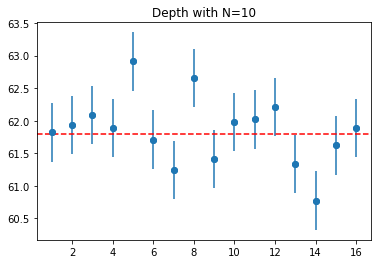

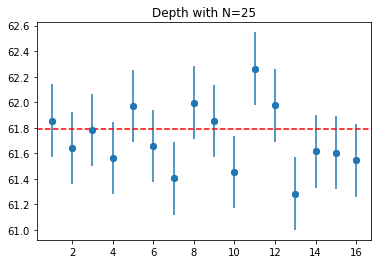

In [ ]:
#depth, n=10
mediaAleatoriasDepth_10, error=muestrasAleatorias(depth,10,16,depth_pstdev)
plotScatterWithError(range(1,17),mediaAleatoriasDepth_10,error,'Depth with N=10',depth_mean)

#depth, n=25
mediaAleatoriasDepth_25, error=muestrasAleatorias(depth,25,16,depth_pstdev)
plotScatterWithError(range(1,17),mediaAleatoriasDepth_25,error,'Depth with N=25',depth_mean)

##Variable 'price'

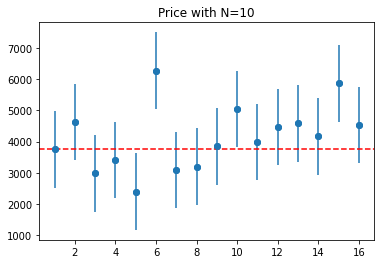

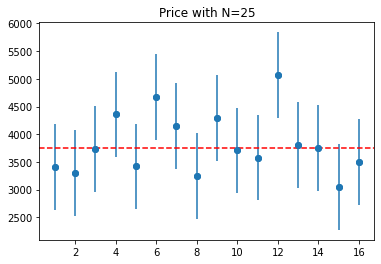

In [ ]:
#price, n=10
mediaAleatoriasPrice_10, error=muestrasAleatorias(price,10,16,price_pstdev)
plotScatterWithError(range(1,17),mediaAleatoriasPrice_10,error,'Price with N=10',price_mean)

#price, n=25
mediaAleatoriasPrice_25, error=muestrasAleatorias(price,25,16,price_pstdev)
plotScatterWithError(range(1,17),mediaAleatoriasPrice_25,error,'Price with N=25',price_mean)

#Parte 5

- Graficar un histograma que ilustre la distribución de las medias muestrales de $n=10$ observaciones. Repita lo mismo con $n=25$. ¿Qué diferencia encuentra entre ambos histogramas?(**15 puntos**)

In [ ]:
def showhist(data,title,pop_mean):
  plt.title(title)
  plt.hist(data)
  plt.axvline(x=pop_mean, color='red')
  plt.show

##Variable 'depth'

SD de las medias muestrales = 0.44948370382028296


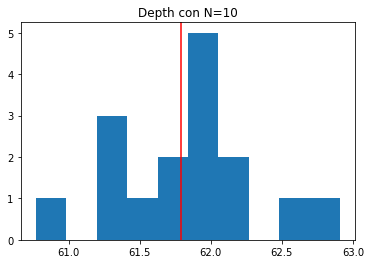

In [ ]:
showhist(mediaAleatoriasDepth_10, 'Depth con N=10', depth_mean)
print('SD de las medias muestrales =', depth_pstdev/np.sqrt(10))

SD de las medias muestrales = 0.2842784550401243


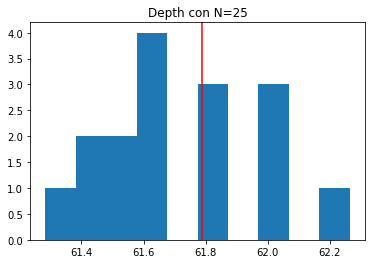

In [ ]:
showhist(mediaAleatoriasDepth_25, 'Depth con N=25', depth_mean)
print('SD de las medias muestrales =', depth_pstdev/np.sqrt(25))

In [ ]:
#depth, SD de la medias muestrales para tamaños de muestra adicionales
print('n=50,', 'SD =', depth_pstdev/np.sqrt(50))
print('n=100,', 'SD =', depth_pstdev/np.sqrt(100))

n=50, SD = 0.20101522330410693
n=100, SD = 0.14213922752006214


##Variable 'price'

SD de las medias muestrales = 1225.3943104476614


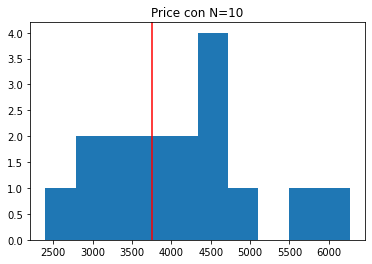

In [ ]:
showhist(mediaAleatoriasPrice_10, 'Price con N=10', price_mean)
print('SD de las medias muestrales =', price_pstdev/np.sqrt(10))

SD de las medias muestrales = 775.0074105652151


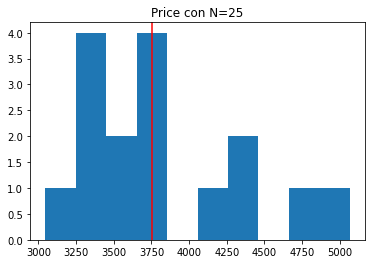

In [ ]:
showhist(mediaAleatoriasPrice_25, 'Price con N=25', price_mean)
print('SD de las medias muestrales =', price_pstdev/np.sqrt(25))

In [ ]:
#price, SD de la medias muestrales para tamaños de muestra adicionales
print('n=50,', 'SD =', price_pstdev/np.sqrt(50))
print('n=100,', 'SD =', price_pstdev/np.sqrt(100))

n=50, SD = 548.0129954804903
n=100, SD = 387.50370528260754


Al graficar los histogramas, se observa que la varianza alrededor del valor de la media poblacional (que se está estimando) disminuye conforme aumenta la cantidad de observaciones por muestra $n$. Esto se fundamenta en el Teorema del Límite Central, el cual establece que las medias de las muestras siguen una distribución normal, con media $\mu_{\overline{x}}=\mu$, y varianza $\sigma_{\overline{x}}^{2}=\frac{\sigma^{2}}{n}$.

Asimismo, esto también se observó al calcular el valor de la desviación estándar de las medias muestrales, dado por $\frac{\sigma}{\sqrt{n}}$, y utilizando dos tamaños de muestra adicionales, $n=50$ y $n=100$. Tal como lo establece el TLC, la desviación estándar de las medias muestrales disminuye conforme aumenta la cantidad de observaciones por muestra $n$.